# SDPA Coursework Part3
## A Glance at Virtual Streamer
vtb vup, vcc(Virtual Streamer)

In [2]:

import json
import numpy as np
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from bs4 import BeautifulSoup

In [5]:
import re

In [5]:
url = "https://vtubie.com/allvtubers/?pg="
# pg_1 = requests.get("https://vtubie.com/allvtubers/?pg=1")

link_set = set() # for every vtuber's info page

for page in range(1,51):
    print("processing page " + str(page))
    url_full = url + str(page)
    pg_get = requests.get(url_full) # requests for one page
    pg_soup = BeautifulSoup(pg_get.text)
    for a in pg_soup.find_all(title = "Visit VTuber"):
        link_set.add(a.attrs['href'])
        
print(len(link_set))
link_set
    
    

processing page 1


KeyboardInterrupt: 

In [ ]:
# create dataframe's header
vt_all_info_df = pd.DataFrame(columns=col_name)

# parse html -> dataframe
for idx, vtuber_info_url in enumerate(link_set):
    print(idx, end = " -> ")
    vt_info_get = requests.get(vtuber_info_url) # requests the vtuber information page
    vt_info_soup = BeautifulSoup(vt_info_get.text) # parse the html by beautifulsoup 
    
    name = vt_info_soup.find("h1").get_text() # name of the vtb
    try:
        type_ = vt_info_soup.find_all("a", href = re.compile("/type/*"))[0].get_text()
    except IndexError:
        pass
    
    group = vt_info_soup.find_all("a", href = re.compile("https://vtubie.com/g/*"), title = False)[0].get_text()
    
    genre = vt_info_soup.find_all("a", href = re.compile("/genre/*"))
    genre_list = [(lambda s: s.get_text())(i) for i in genre]
    try:
        gender = vt_info_soup.find_all("a", href = re.compile("/gender/*"))[0].get_text()
    except IndexError:
        pass
    
    language = vt_info_soup.find_all("a", href = re.compile("/language/*"))
    language_list = [(lambda s: s.get_text())(i) for i in language]
    
    model = vt_info_soup.find_all("a", href = re.compile("/model/*"))
    model_list = [(lambda s: s.get_text())(i) for i in model]
    
    debut = vt_info_soup.find_all(string = "Debut ")[0].parent.find_next_sibling().get_text().strip()
    status = vt_info_soup.find_all(string = "Status")[0].parent.parent.find_next_sibling().get_text().strip()
    freq = vt_info_soup.find_all(string = "Release Frequency")[0].parent.find_next_sibling().get_text().strip()
    subs = vt_info_soup.find(string = "Subs").parent.find_next_sibling().get_text().strip()
    views = vt_info_soup.find(string = "Views").parent.find_next_sibling().get_text().strip()
    
    col = [name, type_, group, genre_list, gender, language_list, model_list, debut, status, freq, subs, views]
    col_name = ['name', 'type_', 'group', 'genre_list', 'gender', 'language_list', 'model_list', 'debut', 'status', 'freq', 'subs', 'views']
    vt_info_df = pd.DataFrame([col], columns=col_name)
    vt_all_info_df = vt_all_info_df.append(vt_info_df, ignore_index = True)



In [ ]:
# save the dataframe into a csv
vt_all_info_df.to_csv("vt_all_info_df_origin.csv")


In [6]:
# read from the csv
vt_all_info_df = pd.read_csv("vt_all_info_df_origin.csv")

## Data Review
Let's check the data initially.

In [7]:
vt_all_info_df.head(10)

,Unnamed: 0,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views
0,0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609k,104.6m
1,1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285k,25.3m
2,2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151k,41.9m
3,3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254k,29.9m
4,4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90.1k,9.4m
5,5,Shimamura Charlotte,VTuber,HoneyStrap,[],Female,['Japanese'],"['3D', 'L2D']",2018/07/14,+ Add,Every 1.16 Day(s),75.9k,8m
6,6,Cry,VStreamer,Independent,['Art'],Female,['English'],[],+ Add,Active,Every 9.44 Day(s),475.7k,41.5m
7,7,Lumi Celestia,VTuber,MAHAPANCA,[],Female,['Indonesian'],['L2D'],2020/08/01,+ Add,Every 4.79 Day(s),177k,5.9m
8,8,Wolfychu,VStreamer,Independent,['Gaming'],Female,['English'],['L2D'],11/08/2020,Active,Every 1.96 Day(s),501.1k,5.3m
9,9,Sakura Ritsuki,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2018/08/31,+ Add,Every 1.16 Day(s),205k,26m


In [8]:
vt_all_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     500 non-null    int64 
 1   name           500 non-null    object
 2   type_          500 non-null    object
 3   group          500 non-null    object
 4   genre_list     500 non-null    object
 5   gender         500 non-null    object
 6   language_list  500 non-null    object
 7   model_list     500 non-null    object
 8   debut          500 non-null    object
 9   status         500 non-null    object
 10  freq           500 non-null    object
 11  subs           500 non-null    object
 12  views          500 non-null    object
dtypes: int64(1), object(12)
memory usage: 50.9+ KB


In [9]:
# check how many categories in "type_"
vt_all_info_df.type_.value_counts()

VTuber       457
VStreamer     43
Name: type_, dtype: int64

In [10]:
# check how many categories in "group"
print(vt_all_info_df.group.value_counts().head())
print("Total numbers of categories: ", vt_all_info_df.group.value_counts().count())

Independent    247
Nijisanji      108
Hololive        57
.LIVE           12
VShojo           9
Name: group, dtype: int64
Total numbers of categories:  34


In [11]:
# how many categories in "language"
print(vt_all_info_df.language_list.value_counts().head())
print("Total numbers of categories: ", vt_all_info_df.language_list.value_counts().count())

['Japanese']                             361
['English']                               77
['Indonesian']                            12
['English', 'Indonesian', 'Japanese']      5
['English', 'Indonesian']                  5
Name: language_list, dtype: int64
Total numbers of categories:  29


In [12]:
# how many categories in "genre"
print(vt_all_info_df.genre_list.value_counts().head())
print("Total numbers of categories: ", vt_all_info_df.genre_list.value_counts().count())

[]                                 363
['Chatting', 'Gaming', 'Music']     32
['Chatting', 'Gaming']              20
['Gaming']                          19
['Music']                            5
Name: genre_list, dtype: int64
Total numbers of categories:  51


In [13]:
# how many categories in "gender"
print(vt_all_info_df.gender.value_counts().head())
print("Total numbers of categories: ", vt_all_info_df.gender.value_counts().count())

Female         411
Male            81
Agender          5
Genderfluid      2
Non-binary       1
Name: gender, dtype: int64
Total numbers of categories:  5


In [14]:
# how many categories in "model_list"
vt_all_info_df.model_list.value_counts()

['L2D']                         177
[]                              127
['3D', 'L2D']                   109
['3D']                           80
['3D', 'JPEG', 'L2D']             1
['JPEG', 'L2D']                   1
['Model', 'L2D']                  1
['JPEG', 'L2D', 'PNG']            1
['L2D', 'PNG']                    1
['PNG']                           1
['3D', 'GIF', 'JPEG', 'PNG']      1
Name: model_list, dtype: int64

In [15]:
# how many categories in "status"
vt_all_info_df.status.value_counts()


+ Add      333
Active     158
Retired      9
Name: status, dtype: int64

- The first column is index column ,and it is meaningless.  
- The type_ coloum have 2 types: VTuber and VStreamer. In my opinion, the two categories are actually vague on the website. For example, Nyatasha Nyanners is a famous virtual streamer on Twitch (a live stream platform), but her type on the website is VTuber.
- The genre_list column have many null values, and it need to be convert from list to NoneType.  
- The gender column have 5 categories. To simplified, turn all the non-binary categories in to "non-binary".  
- Some VTuber have multiple language in their language list. Need to check whether the language list has null values.  
- The modol_list has 4 kinds of model, picture type, GIF, 3D and L2D (Live2D). The null values in model list are the same as genre list.  
- The debut column indicates the date when the VTuber began their activity. The date formats are mixed, and the null values are shown as "+ Add".  
- The status column has many missing values. However, the retired VTubers are marked, and thus, the missing value can be consider as active. 
- The freq column indicates that the content release frequency of the VTuber.
- The subs (subscribe) and views (video views).

## Data Cleaning
Next I am going to clean the data and prepare for analysis.

In [16]:
# delete the meaningless column
vt_all_info_df.pop("Unnamed: 0")
vt_all_info_df.head()

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views
0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609k,104.6m
1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285k,25.3m
2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151k,41.9m
3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254k,29.9m
4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90.1k,9.4m


In [17]:
# convert the group into a binary category variable
vt_all_info_df["has_group"] = (vt_all_info_df.group != "Independent")
vt_all_info_df.head(10)

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group
0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609k,104.6m,True
1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285k,25.3m,True
2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151k,41.9m,False
3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254k,29.9m,True
4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90.1k,9.4m,True
5,Shimamura Charlotte,VTuber,HoneyStrap,[],Female,['Japanese'],"['3D', 'L2D']",2018/07/14,+ Add,Every 1.16 Day(s),75.9k,8m,True
6,Cry,VStreamer,Independent,['Art'],Female,['English'],[],+ Add,Active,Every 9.44 Day(s),475.7k,41.5m,False
7,Lumi Celestia,VTuber,MAHAPANCA,[],Female,['Indonesian'],['L2D'],2020/08/01,+ Add,Every 4.79 Day(s),177k,5.9m,True
8,Wolfychu,VStreamer,Independent,['Gaming'],Female,['English'],['L2D'],11/08/2020,Active,Every 1.96 Day(s),501.1k,5.3m,False
9,Sakura Ritsuki,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2018/08/31,+ Add,Every 1.16 Day(s),205k,26m,True


The release frequency column is string type now. It need to be parsed into float type. The structure of the string seems fixed but the column might has null values. I need to find the null values structure firstly.

In [18]:
# find the string structure of null values
vt_all_info_df[vt_all_info_df['freq'].apply(lambda x: True if x[:5] != "Every" else False)] 

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group
15,遠北千南 / Achikita Chinami 【にじさんじ】,VTuber,Independent,[],Female,['Japanese'],[],+ Add,+ Add,—,77k,3.8m,False


In [19]:
# parse the freq -> float type
vt_all_info_df['freq_float'] = vt_all_info_df["freq"].apply(lambda x: x.split() if x[:5] == "Every" else [None, None])\
.apply(lambda x: float(x[1]) if x[1] else np.nan)

vt_all_info_df.head()

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group,freq_float
0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609k,104.6m,True,2.51
1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285k,25.3m,True,1.91
2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151k,41.9m,False,1.83
3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254k,29.9m,True,2.83
4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90.1k,9.4m,True,1.72


The number of subscribe and the number of view are strings, and they use k, m, and b to stand for thousand, million, and billion.

In [20]:
# subs and views convert to int
unit_trans = {'k': 1000, 'm': 1000000, 'b': 1000000000}

# vt_all_info_df["subs"].apply(lambda x: x[-1]).value_counts() # -> subs value have no missing value
# vt_all_info_df["views"].apply(lambda x: x[-1]).value_counts() # -> subs value have no missing value

vt_all_info_df["subs"] = vt_all_info_df["subs"].apply(lambda x: float(x[:-1]) * unit_trans[x[-1]])
vt_all_info_df["views"] = vt_all_info_df["views"].apply(lambda x: float(x[:-1]) * unit_trans[x[-1]])

vt_all_info_df.head()

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group,freq_float
0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609000.0,104600000.0,True,2.51
1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285000.0,25300000.0,True,1.91
2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151000.0,41900000.0,False,1.83
3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254000.0,29900000.0,True,2.83
4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90100.0,9400000.0,True,1.72


The debut date can convert to the exist days.

In [21]:
# convert the debut date into vtuber existence days

# dealing with mixed format of datetime
date1 = pd.to_datetime(vt_all_info_df.debut, errors="coerce", format="%Y/%m/%d")
date2 = pd.to_datetime(vt_all_info_df.debut, errors="coerce", format="%d/%m/%Y")
date3 = pd.to_datetime(vt_all_info_df.debut, errors="coerce", format="%m/%d/%Y")
date4 = pd.to_datetime(vt_all_info_df.debut, errors="coerce", format="%d %b %Y")
date5 = pd.to_datetime(vt_all_info_df.debut, errors="coerce", format="%d %B %Y")
date6 = pd.to_datetime(vt_all_info_df.debut, errors="coerce", format="%b %d %Y")

vt_all_info_df["debut_dt"] = date1
vt_all_info_df["debut_dt"].fillna(date2, inplace = True)
vt_all_info_df["debut_dt"].fillna(date3, inplace = True)
vt_all_info_df["debut_dt"].fillna(date4, inplace = True)
vt_all_info_df["debut_dt"].fillna(date5, inplace = True)
vt_all_info_df["debut_dt"].fillna(date6, inplace = True)


In [22]:
vt_all_info_df["exist_days"] = (pd.to_datetime("now") - vt_all_info_df["debut_dt"]).dt.days

In [23]:
vt_all_info_df.head()

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group,freq_float,debut_dt,exist_days
0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609000.0,104600000.0,True,2.51,2019-03-23,1021.0
1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285000.0,25300000.0,True,1.91,2019-12-29,740.0
2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151000.0,41900000.0,False,1.83,NaT,NaN
3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254000.0,29900000.0,True,2.83,2019-09-21,839.0
4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90100.0,9400000.0,True,1.72,2018-06-09,1308.0


Add a column named "is_active". The retired VTubers are False in the column, and other VTubers, including missing value, are True.

In [24]:
vt_all_info_df["is_active"] = vt_all_info_df.status != "Retired"
vt_all_info_df.head()

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group,freq_float,debut_dt,exist_days,is_active
0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609000.0,104600000.0,True,2.51,2019-03-23,1021.0,True
1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285000.0,25300000.0,True,1.91,2019-12-29,740.0,True
2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151000.0,41900000.0,False,1.83,NaT,NaN,True
3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254000.0,29900000.0,True,2.83,2019-09-21,839.0,True
4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90100.0,9400000.0,True,1.72,2018-06-09,1308.0,True


Turn all the non-binary (not male and not female) gender into "non-binary".

In [25]:
vt_all_info_df.gender.where(((vt_all_info_df.gender == "Male") | (vt_all_info_df.gender == "Female")), "Non-binary", inplace=True)
vt_all_info_df.head()

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group,freq_float,debut_dt,exist_days,is_active
0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609000.0,104600000.0,True,2.51,2019-03-23,1021.0,True
1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285000.0,25300000.0,True,1.91,2019-12-29,740.0,True
2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151000.0,41900000.0,False,1.83,NaT,NaN,True
3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254000.0,29900000.0,True,2.83,2019-09-21,839.0,True
4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90100.0,9400000.0,True,1.72,2018-06-09,1308.0,True


## Exploratory Analysis and Visualisation

In [26]:
import ast # the "list" in the vt_all_info_df is actually str, it need to be convert into list type by ast.literal_eval()
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.figsize'] = (10,7.5)
color_set = sns.color_palette('pastel')

In [27]:
# describe the dataframe

vt_all_info_df.describe()

,subs,views,freq_float,exist_days
count,5.000000e+02,5.000000e+02,499.000000,355.000000
mean,3.794032e+05,5.781228e+07,5.608136,1021.090141
std,6.509501e+05,3.441007e+08,11.309039,438.202985
min,7.130000e+04,5.345000e+05,0.270000,90.000000
25%,1.120000e+05,7.200000e+06,1.350000,706.000000
50%,1.940000e+05,1.755000e+07,2.130000,1056.000000
75%,3.882500e+05,5.435000e+07,4.750000,1315.000000
max,1.100000e+07,7.600000e+09,147.860000,4473.000000


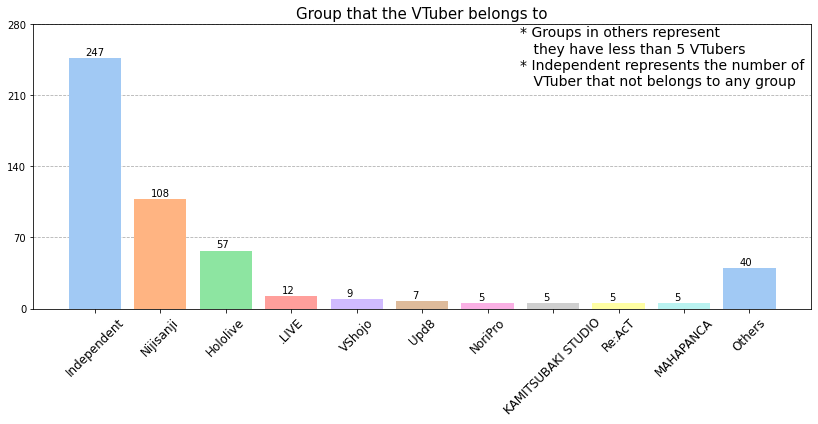

In [84]:
# group
Others_value = vt_all_info_df.group.value_counts()[vt_all_info_df.group.value_counts() < 5].sum()

group_bar_df = vt_all_info_df.group.value_counts()[vt_all_info_df.group.value_counts() >= 5].append\
(pd.Series({"Others": Others_value}))

plt.figure(figsize=(12,6), tight_layout = True)
plt.title("Group that the VTuber belongs to", fontsize = 15)
plt.grid(axis = 'y', linestyle = "--", zorder = 0)
plt.bar(group_bar_df.index, group_bar_df.values, color = color_set, zorder = 3)
plt.xticks(rotation=45,fontsize = 12)

for idx, val in enumerate(group_bar_df.values):
    plt.text(idx - 0.15, val + 3, val)
    
plt.yticks(np.linspace(0, 280, 5))
plt.text(6.5,220,"* Groups in others represent \n   they have less than 5 VTubers\
\n* Independent represents the number of \n   VTuber that not belongs to any group", fontsize = 14);

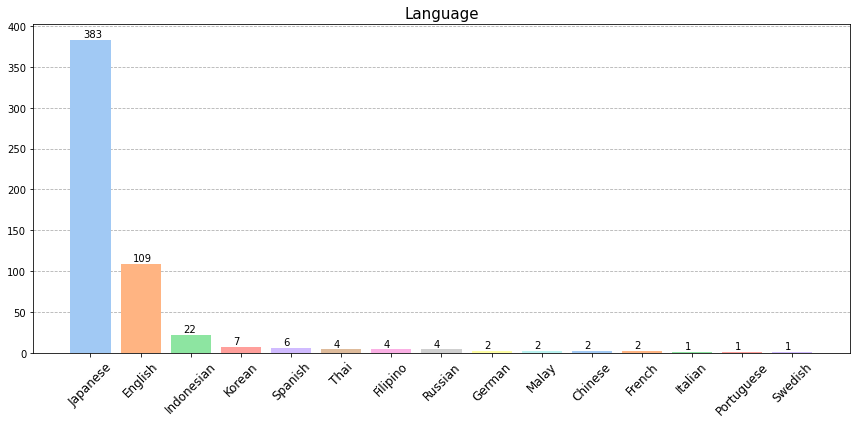

In [50]:
# language
language_bar_df = vt_all_info_df['language_list'].apply(ast.literal_eval).explode().value_counts()

plt.figure(figsize=(12,6), tight_layout = True)
plt.title("Language", fontsize = 15)
plt.grid(axis = 'y', linestyle = "--", zorder = 0)
plt.bar(language_bar_df.index, language_bar_df.values, color = color_set, zorder = 3)
plt.xticks(rotation= 45,fontsize = 12)
for idx, val in enumerate(language_bar_df.values):
    plt.text(idx - 0.15, val + 3, val)


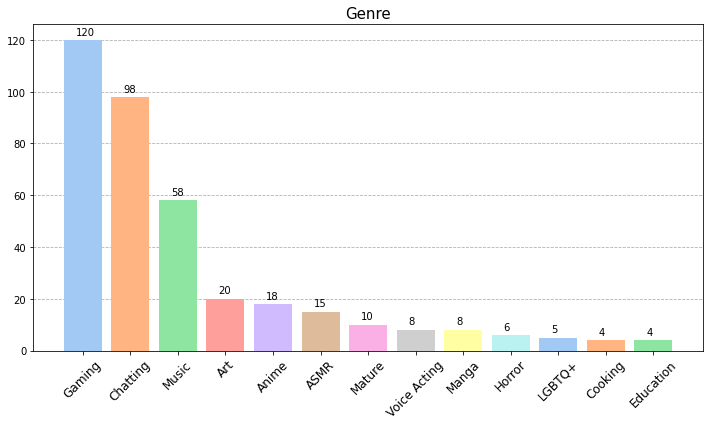

In [88]:
# genre
genre_bar_df = vt_all_info_df['genre_list'].apply(ast.literal_eval).explode().value_counts()

plt.figure(figsize=(12,6))
plt.title("Genre", fontsize = 15)
plt.grid(axis = 'y', linestyle = "--", zorder = 0)
plt.bar(genre_bar_df.index, genre_bar_df.values, color = color_set, zorder = 3);
plt.xticks(rotation= 45,fontsize = 12)

for idx, val in enumerate(genre_bar_df.values):
    plt.text(idx - 0.15, val + 2, val)

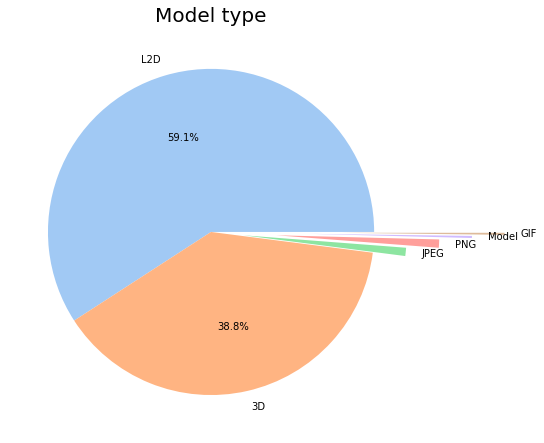

In [118]:
# model
model_pie_df = vt_all_info_df['model_list'].apply(ast.literal_eval).explode().value_counts(normalize=True)

patches,l_text,p_text = plt.pie(model_pie_df, labels=model_pie_df.index, labeldistance=1.1, colors=color_set, \
                        autopct = lambda p: format(p, '.1f') + '%' if p > 15 else None, \
                        explode = (0,0,0.2,0.4,0.6,0.8))
 
    
plt.title("Model type", fontsize = 20);

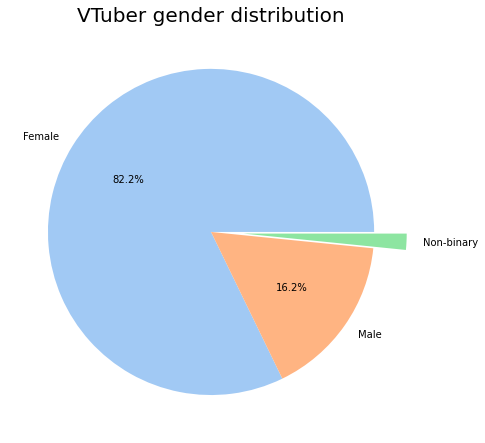

In [121]:
# gender
gender_pie_df = vt_all_info_df["gender"].value_counts(normalize=True)


plt.pie(gender_pie_df, labels=gender_pie_df.index, labeldistance=1.1, colors=color_set, \
                        autopct = lambda p: format(p, '.1f') + '%' if p > 15 else None, \
                        explode = (0,0,0.2));
plt.title("VTuber gender distribution", fontsize = 20);

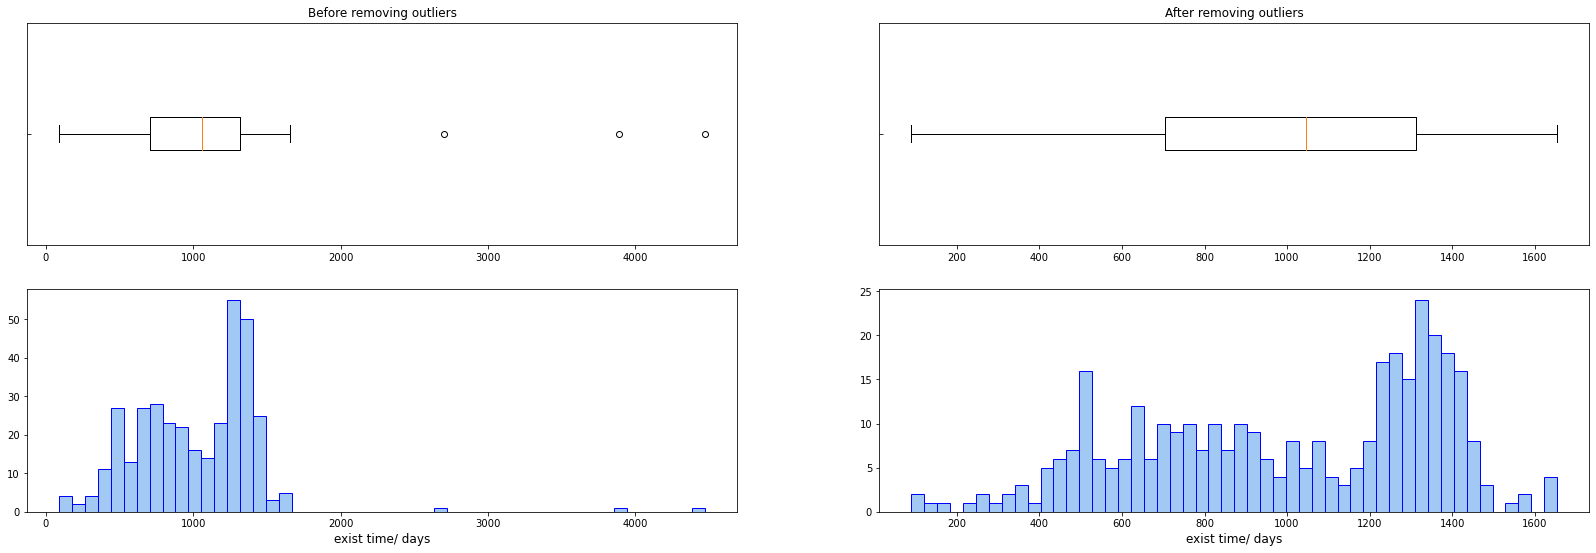

In [193]:
# exist time
fig, ax = plt.subplots(2,2, figsize = (28,9))

ax[0][0].boxplot(vt_all_info_df["exist_days"].dropna(), vert=False)
ax[0][0].set_yticklabels("")
ax[0][0].tick_params("y", direction = "in")
ax[0][0].set_title("Before removing outliers")

ax[1][0].hist(vt_all_info_df.exist_days, bins=50, edgecolor = "blue", color = color_set[0]);
ax[1][0].set_xlabel("exist time/ days", fontsize = 12)

ax[0][1].set_title("After removing outliers")
ax[0][1].boxplot(vt_all_info_df.exist_days[vt_all_info_df.exist_days < 2000], vert=False)
ax[0][1].set_yticklabels("")
ax[0][1].tick_params("y", direction = "in")

ax[1][1].hist(vt_all_info_df.exist_days[vt_all_info_df.exist_days < 2000], bins=50, edgecolor = "blue", color = color_set[0]);
ax[1][1].set_xlabel("exist time/ days", fontsize = 12);

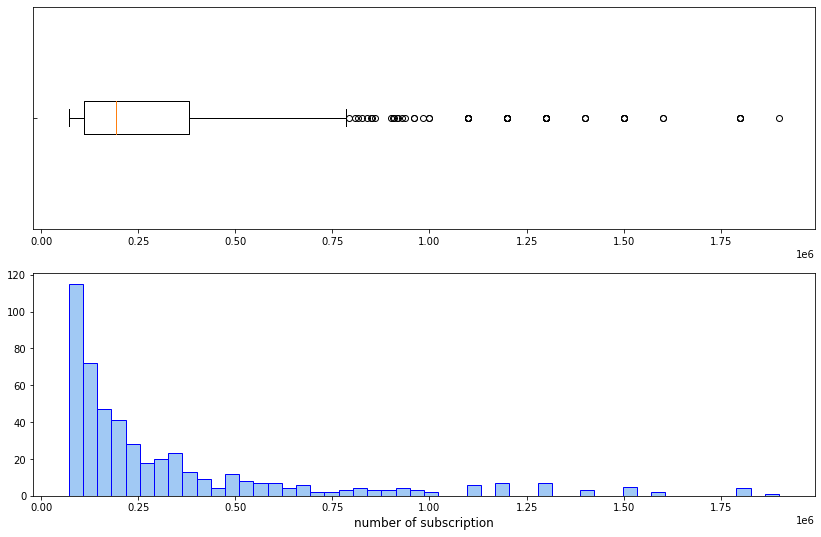

In [203]:
# subs and views
fig, ax = plt.subplots(2,1, figsize = (14,9))

ax[0].boxplot(vt_all_info_df.subs[vt_all_info_df.subs < 2000000], vert=False)
ax[0].set_yticklabels("")
ax[0].tick_params("y", direction = "in")
# ax[0].set_title("Before removing outliers")

ax[1].hist(vt_all_info_df.subs[vt_all_info_df.subs < 2000000], bins=50, edgecolor = "blue", color = color_set[0]);
ax[1].set_xlabel("number of subscription", fontsize = 12);

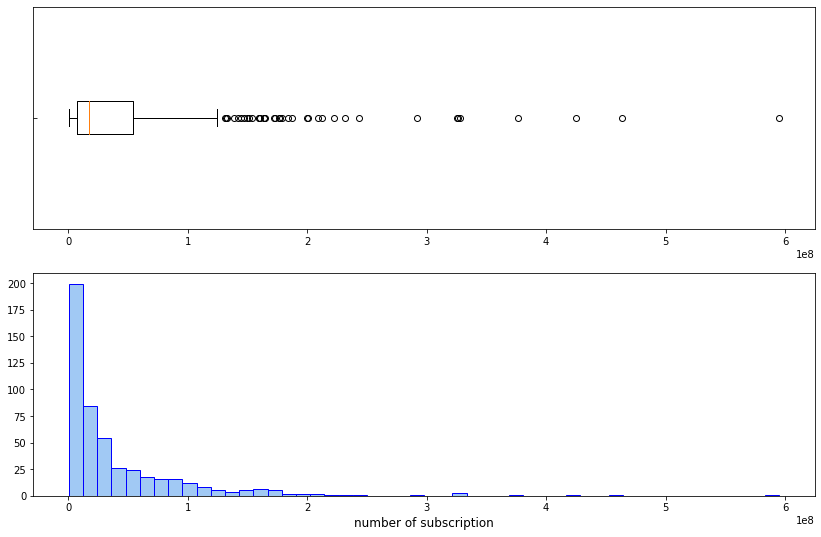

In [204]:
fig, ax = plt.subplots(2,1, figsize = (14,9))

ax[0].boxplot(vt_all_info_df.views[vt_all_info_df.views < 2000000000], vert=False)
ax[0].set_yticklabels("")
ax[0].tick_params("y", direction = "in")
# ax[0].set_title("Before removing outliers")

ax[1].hist(vt_all_info_df.views[vt_all_info_df.views < 2000000000], bins=50, edgecolor = "blue", color = color_set[0]);
ax[1].set_xlabel("number of subscription", fontsize = 12);

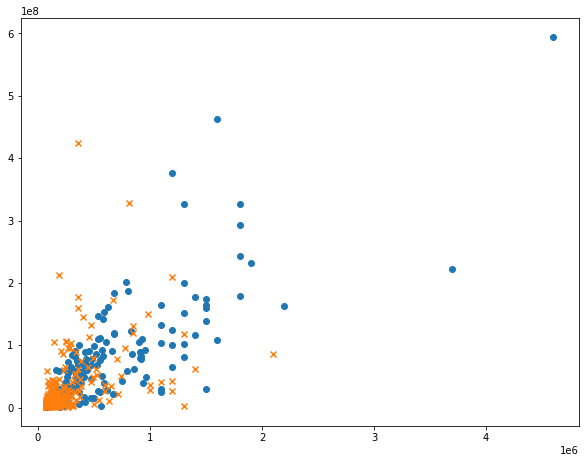

In [236]:
# relation between subs and views
plt.scatter(vt_all_info_df.subs[(vt_all_info_df.subs < 5000000) & (vt_all_info_df.has_group)],\
            vt_all_info_df.views[(vt_all_info_df.subs < 5000000) & (vt_all_info_df.has_group)])
plt.scatter(vt_all_info_df.subs[(vt_all_info_df.subs < 5000000) & (~vt_all_info_df.has_group)],\
            vt_all_info_df.views[(vt_all_info_df.subs < 5000000) & (~vt_all_info_df.has_group)], marker='x')

Train Data X Shape (374, 1), y Shape (374, 1)
Test Data X Shape (125, 1), y Shape (125, 1)
Model slope:  [102.36583226]
Model intercept: [5859925.39369611]
0.5351962239209833


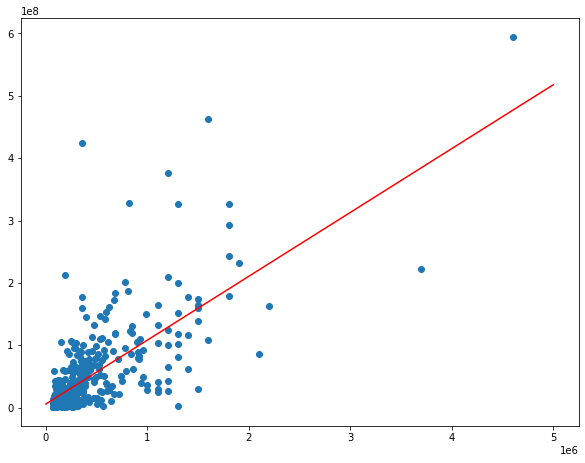

In [248]:
# 通过线性回归订阅数与播放量的关系
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x = np.array(vt_all_info_df.subs[vt_all_info_df.subs < 5000000]).reshape(-1,1)
y = np.array(vt_all_info_df.views[vt_all_info_df.subs < 5000000]).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
print("Train Data X Shape %s, y Shape %s" % (x_train.shape, y_train.shape))
print("Test Data X Shape %s, y Shape %s" % (x_test.shape, y_test.shape))

model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)

xfit = np.linspace(0, 5000000, 1000)
yfit = model.predict(xfit.reshape(1000, 1))

plt.scatter(x, y)
plt.plot(xfit, yfit,color="red");

print("Model slope: ", model.coef_[0])
print("Model intercept:", model.intercept_)
print(model.score(x_test, y_test))

# R2 for the regression
# regr.score(diabetes_X_test,diabetes_y_test)
# r2_score(diabetes_y_test, diabetes_y_pred)


In [230]:
# 通过假设检验验证加入团队对vtb订阅数有好处
# If I want to be a famous VTuber, should I join in a group?
# H0: Joining in a group has no effect on the number of subs
# Ha: Joining in a group has effect on the number of subs
from scipy import stats

sample_in_group = vt_all_info_df.subs[vt_all_info_df.has_group == True]
sample_not_group = vt_all_info_df.subs[vt_all_info_df.has_group == False]

r = stats.ttest_ind(sample_in_group, sample_not_group, equal_var=False)


print("statistic:", r.__getattribute__("statistic"))
print("pvalue:", r.__getattribute__("pvalue"))


statistic: 2.8744237000231267
pvalue: 0.004238605252967506


LeveneResult(statistic=4.976529093623363, pvalue=0.026138053023652782)
